#QOSF Screening Task #1
**Alexandros Mylonas**

We first import the libraries we will use in this task:

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

#Simulation with **matrix** multiplication method

Then, we define the gates $X$, $H$ and $CNOT$, which will be the elements of the quantum circuit:

In [2]:
def X():
    return np.array([[0, 1], [1, 0]], dtype=complex)

def H():
    return np.array([[1, 1], [1, -1]], dtype=complex) / np.sqrt(2)

def CNOT():
    return np.array([[1, 0, 0, 0],
                     [0, 1, 0, 0],
                     [0, 0, 0, 1],
                     [0, 0, 1, 0]], dtype=complex)

def I():
    return np.array([[1, 0], [0, 1]], dtype=complex)

We initialize the state vector for $n$ qubits:

In [3]:
def initialize_statevector(n):
    return np.array([1] + [0] * (2**n - 1), dtype=complex)

Then, we apply the "naive" matrix multiplication to simulate the quantum circuit. We need to create different functions for the single-qubit gates $(X, H, I)$ and the multiple-qubit gates $(CNOT)$, as the Controlled-NOT gate connects the two qubits, one control and one target:

In [4]:
# Apply single-qubit gate using matrix multiplication
def apply_single_qubit_gate(state, gate, qubit, n):
    operator = 1
    for i in range(n):
        operator = np.kron(operator, gate if i == qubit else I())
    return operator @ state

# Apply CNOT gate using matrix multiplication
def apply_cnot_gate(state, control, target, n):
    identity = np.eye(2**(n - 2), dtype=complex)
    if control < target:
        cnot_matrix = np.kron(np.kron(np.eye(2**control), CNOT()), np.eye(2**(n - target - 1)))
    else:
        cnot_matrix = np.kron(np.eye(2**(control)), np.kron(CNOT(), identity))
    return cnot_matrix @ state

We measure the runtime for the "naive" method of matrix multiplication:

In [5]:
def runtime_matrix(n):
    start_time = time.time()
    state = initialize_statevector(n)
    state = apply_single_qubit_gate(state, H(), 0, n)
    if n > 1:
        state = apply_single_qubit_gate(state, X(), 1, n)
        state = apply_cnot_gate(state, 0, 1, n)
    return time.time() - start_time

We create a ```for``` loop that runs the matrix multiplication simulation with tensor multiplication for $n$ qubits and measures
the runtime for every iteration:


In [6]:
matrix_qubits = list(range(1, 15))
matrix_runtime=[]
for i in matrix_qubits:
  matrix_runtime=np.append(runtime_matrix(i), matrix_runtime)

In [7]:
print(matrix_runtime)

[1.28761277e+01 3.02809501e+00 9.17665958e-01 2.98856020e-01
 8.07213783e-02 2.31482983e-02 8.18061829e-03 4.53710556e-03
 5.91111183e-03 7.57694244e-04 4.55617905e-04 5.96761703e-04
 1.34468079e-03 1.42254829e-02]


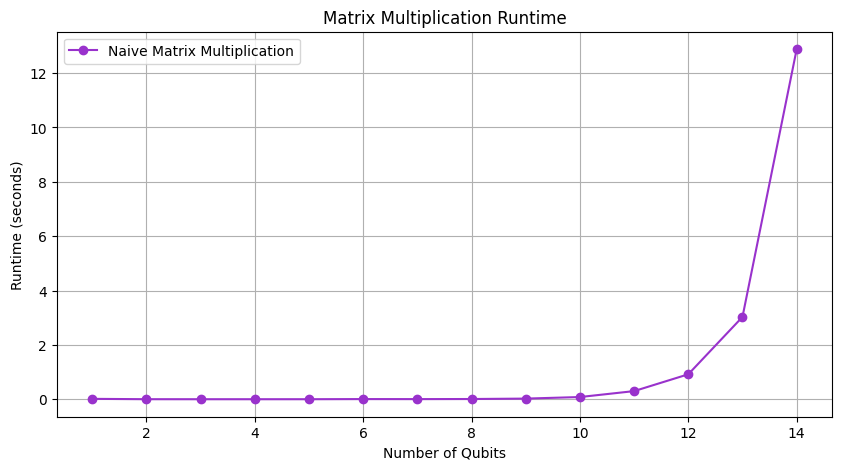

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(matrix_qubits, np.flip(matrix_runtime), marker='o', color="darkorchid", label='Naive Matrix Multiplication')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Matrix Multiplication Runtime')
plt.grid(True)
plt.legend()
plt.show()

#Simulation with **tensor** multiplication method

We initialize the state tensor for $n$ qubits:

In [11]:
# Initialize state as tensor
def initialize_state_tensor(n):
    state = np.zeros((2,) * n, dtype=complex)
    state[(0,) * n] = 1.0
    return state

Then, we apply the tensor multiplication to simulate the quantum circuit. We need to create different functions for the single-qubit gates $(X, H, I)$ and the multiple-qubit gates $(CNOT)$, as the Controlled-NOT gate connects the two qubits, one control and one target:

In [12]:
# Apply single-qubit gate using tensor multiplication
def apply_single_qubit_gate_tensor(state, gate, qubit):
    axes = ([1], [qubit])
    new_state = np.tensordot(gate, state, axes=axes)
    return np.moveaxis(new_state, 0, qubit)

# Apply CNOT gate using tensor multiplication
def apply_cnot_gate_tensor(state, control, target):
    cnot = CNOT().reshape((2, 2, 2, 2))
    axes = ([2, 3], [control, target])
    new_state = np.tensordot(cnot, state, axes=axes)
    return np.moveaxis(new_state, [0, 1], [control, target])

We measure the runtime for the method of tensor multiplication:

In [13]:
# Measure runtime for tensor method
def runtime_tensor(n):
    start_time = time.time()
    state = initialize_state_tensor(n)
    state = apply_single_qubit_gate_tensor(state, H(), 0)
    if n > 1:
        state = apply_single_qubit_gate_tensor(state, X(), 1)
        state = apply_cnot_gate_tensor(state, 0, 1)
    return time.time() - start_time

We create a ```for``` loop that runs the simulation with tensor multiplication for $n$ qubits and measures
the runtime for every iteration:




In [14]:
tensor_qubits = list(range(1, 28))
tensor_runtime=[]
for i in tensor_qubits:
  tensor_runtime=np.append(runtime_tensor(i), tensor_runtime)

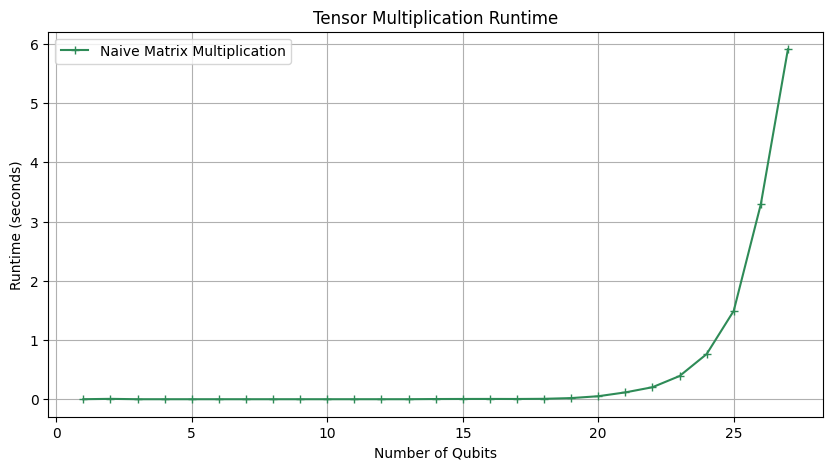

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(tensor_qubits, np.flip(tensor_runtime), marker='+', color="seagreen", label='Naive Matrix Multiplication')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Tensor Multiplication Runtime')
plt.grid(True)
plt.legend()
plt.show()

We plot both matrix and tensor multiplication methods in the same plot:

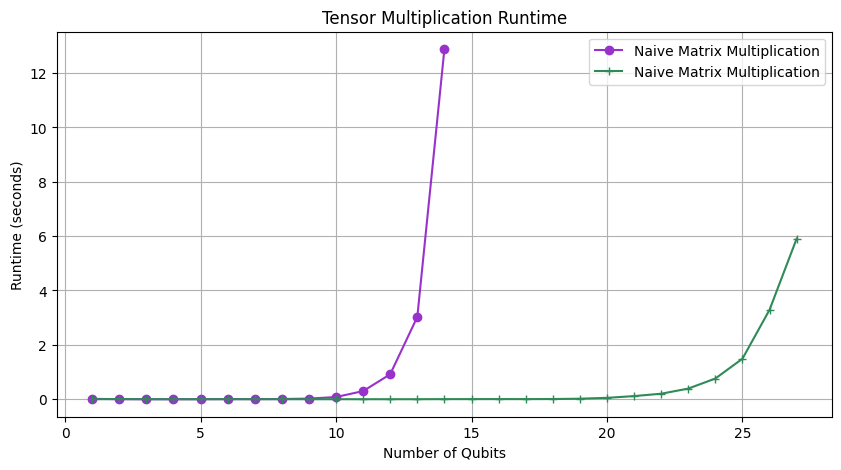

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(matrix_qubits, np.flip(matrix_runtime), marker='o', color="darkorchid", label='Naive Matrix Multiplication')
plt.plot(tensor_qubits, np.flip(tensor_runtime), marker='+', color="seagreen", label='Naive Matrix Multiplication')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Tensor Multiplication Runtime')
plt.grid(True)
plt.legend()
plt.show()

Finally, we plot the runtime of matrix and tensor multiplication until the 14th iteration (14 qubit system) to a semilog plot to zoom in to the smaller runtime values:

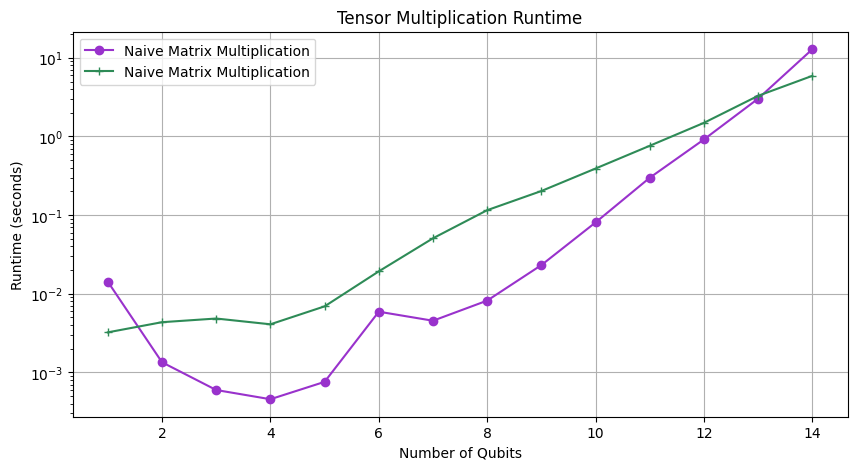

In [17]:
plt.figure(figsize=(10, 5))
plt.semilogy(matrix_qubits, np.flip(matrix_runtime), marker='o', color="darkorchid", label='Naive Matrix Multiplication')
plt.semilogy(matrix_qubits, np.flip(tensor_runtime[0:14]), marker='+', color="seagreen", label='Naive Matrix Multiplication')
plt.xlabel('Number of Qubits')
plt.ylabel('Runtime (seconds)')
plt.title('Tensor Multiplication Runtime')
plt.grid(True)
plt.legend()
plt.show()

We can observe that with matrix multiplication we can simulate a system with a maximum of **15 qubits**, while with tensor multiplication we can simulate a maximum of **28 qubits**. If we try to simulate a system with 16 and 29 qubits respectively we end up with a memory error.

For small systems with less than 10 qubits, matrix multiplication can simulate the system slightly faster than tensor multiplication method. For a system with more than 10 qubits, the memory usage, and thus the runtime, of matrix multiplication grows exponentially with every qubit addition, while with tensor multiplication method the runtime remains in values of below 1 second. The exponential runtime growth of tensor multiplication shows more after the 20th iteration (20 qubit system). In conclusion:


*   For $q\leq10$ (where q the number of qubits) matrix multiplication is slighlty the better choice to simulate a multi-qubit circuit.
*   For $q>10$ (where q the number of qubits) tensor multiplication is by far the better choice to simulate a multi-qubit circuit.

